In [ ]:
!apt update
!pip3 install gym[box2d]
!pip3 install gym[classic_control]
!pip3 install sb3-contrib
!pip install stable-baselines3
'''
Using https://sb3-contrib.readthedocs.io/en/master/modules/trpo.html for TRPO algo implementation
'''

!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [61]:
# import numpy as np
# import gym
# import torch
# import torch.optim as optim
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.distributions as D

In [73]:
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from sb3_contrib import TRPO
from stable_baselines3.common.evaluation import evaluate_policy

In [74]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
# env = gym.make('LunarLander-v2')
env = gym.make('LunarLander-v2',continuous=True)
env.reset()
print("sample action: ", env.action_space.sample())
print("Obsevation space action: ", env.observation_space.shape)
print("sample observation: ", env.observation_space.sample())

In [ ]:
model = TRPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)

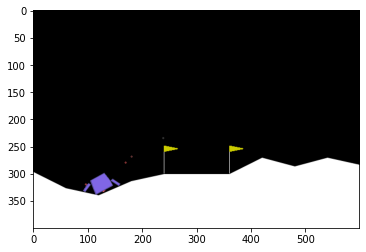

In [69]:
#Testing random walks
img = plt.imshow(env.render('rgb_array')) # only call this once
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

episodes = 10
for ep in range(episodes):
  obs = env.reset()
  done = False
  while not done:
    obs, reward, done, info = env.step(env.action_space.sample())
    #for display
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

In [82]:
evaluate_policy(model, env, n_eval_episodes=10)

(-41.56011841564614, 65.61546782468425)

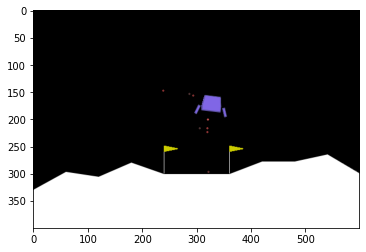

In [ ]:
img = plt.imshow(env.render('rgb_array')) # only call this once
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

obs = env.reset()
while True:
  action, states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
    #for display
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

ipythondisplay.clear_output(wait=True)
env.close()